# 05 Calculating Properties from Well Logs

In this fifth tutorial, you will learn how to calculate properties such as net-to-gross from Well Logs.

<div class="alert alert-block alert-success">
<b>In this tutorial, you will learn the following:</b> <br>
- How to calculate properties from Well Logs <br>

</div>

## Contents
1. [Importing Libraries](#importing_libraries)
2. [Creating a new Borehole object](#creating_borehole_object)
3. [Adding Well Logs](#add_well_logs)
4. [Inspecting the logs](#inspecting_logs)
5. [Plotting Gamma Ray Logs](#plotting_gamma_ray_logs)
6. 

<a id='importing_libraries'></a>
## Importing Libraries
First, we import the `pyborehole` package and check out the version that is installed. For convenience, we are importing the `Borehole` class from the `borehole` module using `from pyborehole.borehole import Borehole`. 

In [1]:
import pyborehole
from pyborehole.borehole import Borehole
pyborehole.__version__

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'v0.0.post18'

<a id='creating_borehole_object'></a>
## Creating a new Borehole object

A new `Borehole` object can be initiated by providing the name of the borehole. The name of the borehole can also be accessed as attribute

In [2]:
borehole = Borehole(name='RWE EB1')
borehole

Borehole: RWE EB1

In [3]:
borehole.init_properties(location=(6.313031, 50.835676), 
                         crs='EPSG:4326', 
                         altitude_above_sea_level=136)

<a id='add_well_logs'></a>

##  Adding Well Logs
Similar to `welly`, `pyborehole` allows the user to load well logs and displaying them. Here, the `lasio` library is utilized.

In [4]:
borehole.add_well_logs('../../../data/0702492023_DataControl_EM.las')

<a id='inspecting_logs'></a>

## Inspecting the Logs

The logs can be inspected as Pandas DataFrame accessing them via the `df` attribute of the `logs` object.

In [5]:
borehole.logs.df

,DEPTH,BHT,DTEMP,CONDUCTIVITY,RMUD,CHT,CALIPER,ZCOR,ZDNC,PEFC,...,RILDC,RILMCX10,RILDCX10,SGR,TH,U,K,KTH,DIP,AZI
0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.6514,1.8866,0.4018,0.2414,10.0240,0.0,0.0
1,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.5465,2.1613,0.4206,0.2562,11.1502,0.0,0.0
2,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.4666,2.4533,0.4397,0.2698,12.3127,0.0,0.0
3,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.3323,2.7352,0.4601,0.2800,13.3879,0.0,0.0
4,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.2159,3.0101,0.4869,0.2895,14.4282,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99.80,NaN,NaN,NaN,NaN,NaN,171.7482,0.2540,2.4586,3.0071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1996,99.85,NaN,NaN,NaN,NaN,NaN,171.7482,0.2468,2.4558,3.0212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1997,99.90,NaN,NaN,NaN,NaN,NaN,171.7482,NaN,NaN,3.0352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1998,99.95,NaN,NaN,NaN,NaN,NaN,171.7482,NaN,NaN,3.0493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


<a id='plotting_gamma_ray_logs'></a>
## Plotting Gamma Ray Logs

Plots can also be customized. Here, we only plot the Gamma Ray curves in different colors and fill the Spectral Gamma Ray Curve by specifying to fill the `0`th axis. The `SGR` curve is also plotted a second time so it can be filled with the results of the Net To Gross calculation later on. 

Text(70.84722222222221, 0.5, 'Depth [m]')

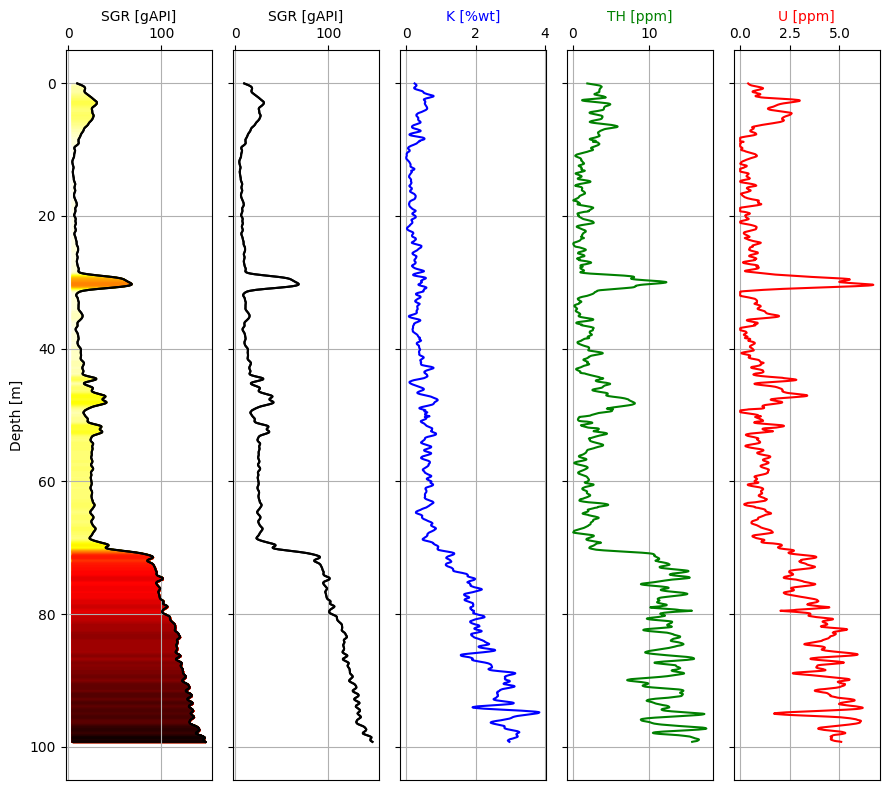

In [6]:
fig, ax = borehole.logs.plot_well_logs(tracks=['SGR', 
                                               'SGR',
                                               'K',
                                               'TH', 
                                               'U',  
                                               ], depth_column='DEPTH', colors=['black', 'black',  'blue', 'green', 'red'], add_well_tops=False, fill_between=0)
ax[0].set_ylabel('Depth [m]')

## Calculating Shale Volume

The Net To Gross ratio can be calculated via the shale volume. Different methods are available. Here, we are using the `linear` method. 

In [7]:
borehole.logs.calculate_vshale(method='linear', 
                               column='SGR')
borehole.logs.df

,DEPTH,BHT,DTEMP,CONDUCTIVITY,RMUD,CHT,CALIPER,ZCOR,ZDNC,PEFC,...,RILMCX10,RILDCX10,SGR,TH,U,K,KTH,DIP,AZI,VShale_Linear
0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.6514,1.8866,0.4018,0.2414,10.0240,0.0,0.0,0.037104
1,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.5465,2.1613,0.4206,0.2562,11.1502,0.0,0.0,0.043358
2,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.4666,2.4533,0.4397,0.2698,12.3127,0.0,0.0,0.049788
3,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.3323,2.7352,0.4601,0.2800,13.3879,0.0,0.0,0.055837
4,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.2159,3.0101,0.4869,0.2895,14.4282,0.0,0.0,0.062012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99.80,NaN,NaN,NaN,NaN,NaN,171.7482,0.2540,2.4586,3.0071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1996,99.85,NaN,NaN,NaN,NaN,NaN,171.7482,0.2468,2.4558,3.0212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1997,99.90,NaN,NaN,NaN,NaN,NaN,171.7482,NaN,NaN,3.0352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1998,99.95,NaN,NaN,NaN,NaN,NaN,171.7482,NaN,NaN,3.0493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


## Calculating Net To Gross

The Net To Gross ratio is also directy calculated using `calculate_net_to_gross()`. A cutoff value needs to be defined to define the reservoir sections. 

In [30]:
net_to_gross = borehole.logs.calculate_net_to_gross(method='linear',
                                                    column='SGR',
                                                    cutoff=0.3)
net_to_gross

0.30831234256926954

In [31]:
borehole.logs.df

,DEPTH,BHT,DTEMP,CONDUCTIVITY,RMUD,CHT,CALIPER,ZCOR,ZDNC,PEFC,...,RILDCX10,SGR,TH,U,K,KTH,DIP,AZI,VShale_Linear,N/G
0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.6514,1.8866,0.4018,0.2414,10.0240,0.0,0.0,0.037104,1
1,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.5465,2.1613,0.4206,0.2562,11.1502,0.0,0.0,0.043358,1
2,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.4666,2.4533,0.4397,0.2698,12.3127,0.0,0.0,0.049788,1
3,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.3323,2.7352,0.4601,0.2800,13.3879,0.0,0.0,0.055837,1
4,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.2159,3.0101,0.4869,0.2895,14.4282,0.0,0.0,0.062012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99.80,NaN,NaN,NaN,NaN,NaN,171.7482,0.2540,2.4586,3.0071,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,-1
1996,99.85,NaN,NaN,NaN,NaN,NaN,171.7482,0.2468,2.4558,3.0212,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,-1
1997,99.90,NaN,NaN,NaN,NaN,NaN,171.7482,NaN,NaN,3.0352,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,-1
1998,99.95,NaN,NaN,NaN,NaN,NaN,171.7482,NaN,NaN,3.0493,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,-1


## Plotting the Reservoir Sections

The reservoir sections can be added to the well log plot by adding the axis where the filling should be added using `add_net_to_gross`, similar to `fill_between`. 

Text(70.84722222222221, 0.5, 'Depth [m]')

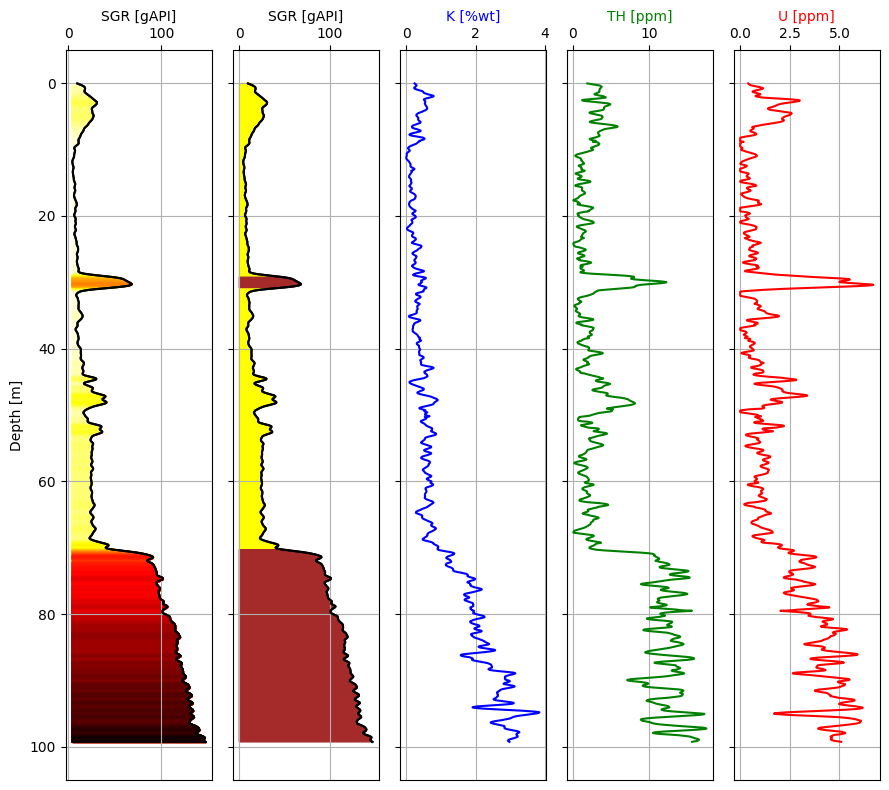

In [29]:
fig, ax = borehole.logs.plot_well_logs(tracks=['SGR', 
                                               'SGR',
                                               'K',
                                               'TH', 
                                               'U',  
                                               ], 
                                       depth_column='DEPTH', 
                                       colors=['black', 
                                               'black',  
                                               'blue', 
                                               'green', 
                                               'red'],
                                       add_well_tops=False, 
                                       fill_between=0,
                                       add_net_to_gross=1)
ax[0].set_ylabel('Depth [m]')

## Limiting the reservoir section

Since reservoirs may not stretch along the entire log, it is also possible to define a reservoir section using the `minz`, `maxz`, and `depth_column` arguments

In [25]:
net_to_gross = borehole.logs.calculate_net_to_gross(method='linear',
                                                    column='SGR',
                                                    cutoff=0.3,
                                                    minz=0,
                                                    maxz=70,
                                                    depth_column='DEPTH')
net_to_gross

0.40714285714285714

Text(70.84722222222221, 0.5, 'Depth [m]')

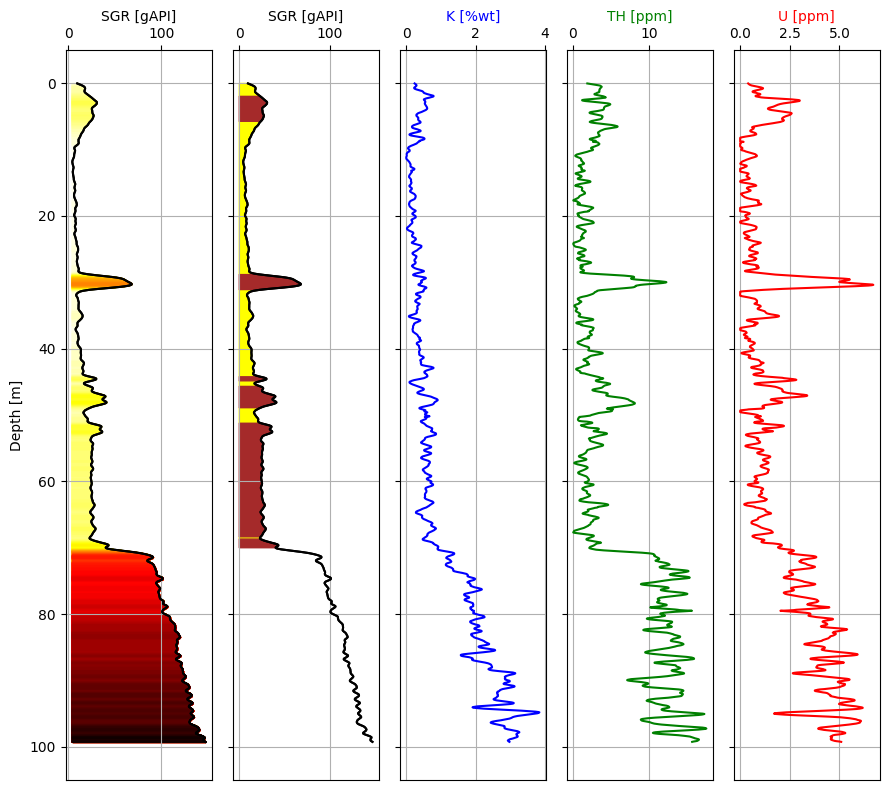

In [26]:
fig, ax = borehole.logs.plot_well_logs(tracks=['SGR', 
                                               'SGR',
                                               'K',
                                               'TH', 
                                               'U',  
                                               ], 
                                       depth_column='DEPTH', 
                                       colors=['black', 
                                               'black',  
                                               'blue', 
                                               'green', 
                                               'red'],
                                       add_well_tops=False, 
                                       fill_between=0,
                                       add_net_to_gross=1)
ax[0].set_ylabel('Depth [m]')